<a href="https://colab.research.google.com/github/RaubCC/Strategy-Sandbox/blob/main/Race_Sim_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0-stop -> total race time: 1823.10s | pit stops at laps []
1-stop -> total race time: 1830.45s | pit stops at laps [10]
2-stop -> total race time: 1847.49s | pit stops at laps [7, 14]


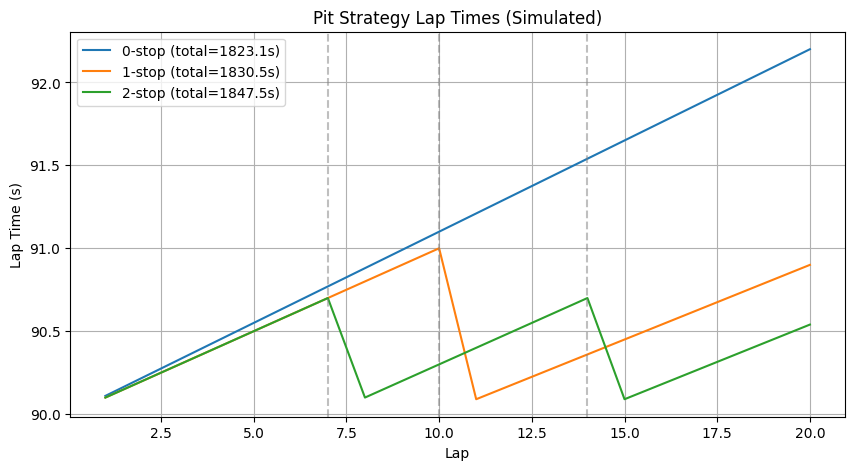

In [ ]:
# Module 4: Lists, Tuples, and For Loops
# Mini Pit Strategy Simulator (with plotting + pit stop markers)

import matplotlib.pyplot as plt

# ----- CONFIG -----
total_laps = 20
base_lap = 90.0
wear_per_lap = 0.1
pit_loss = 20.0

plan_0_stop = [20]
plan_1_stop = [10, 10]
plan_2_stop = [7, 7, 6]

wear_0 = [1.1]
wear_1 = [1.0, 0.9]
wear_2 = [1.0, 1.0, 0.9]
# ------------------

def simulate(stints, wears, name):
    total_time = 0.0
    lap_counter = 0
    lap_times = []  # list of tuples: (lap_number, lap_time)
    pit_laps = []   # list of lap numbers where pit stops happen

    for stint_index in range(len(stints)):
        stint_length = stints[stint_index]
        wear_mult = wears[stint_index]

        for lap_in_stint in range(1, stint_length + 1):
            lap_counter += 1
            lap_time = base_lap + wear_per_lap * wear_mult * lap_in_stint
            total_time += lap_time
            lap_times.append((lap_counter, lap_time))

        if stint_index < len(stints) - 1:
            total_time += pit_loss
            pit_laps.append(lap_counter)  # pit happens after this lap

    return total_time, lap_times, pit_laps

# Run sims
results = []
plans = [
    ("0-stop", plan_0_stop, wear_0),
    ("1-stop", plan_1_stop, wear_1),
    ("2-stop", plan_2_stop, wear_2),
]

for name, stints, wears in plans:
    total, laps, pit_laps = simulate(stints, wears, name)
    results.append((name, total, laps, pit_laps))

# Print results
for name, total, laps, pit_laps in results:
    print(f"{name} -> total race time: {total:.2f}s | pit stops at laps {pit_laps}")

# Plot lap times with pit stop markers
plt.figure(figsize=(10, 5))
for name, total, laps, pit_laps in results:
    lap_nums = [lap for lap, _ in laps]
    lap_times = [t for _, t in laps]
    plt.plot(lap_nums, lap_times, label=f"{name} (total={total:.1f}s)")

    # Add vertical pit-stop lines
    for pit in pit_laps:
        plt.axvline(x=pit, color="gray", linestyle="--", alpha=0.5)

plt.title("Pit Strategy Lap Times (Simulated)")
plt.xlabel("Lap")
plt.ylabel("Lap Time (s)")
plt.legend()
plt.grid(True)
plt.show()


# New Section